# Customer Segmentation / Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA

In [2]:
customers = pd.read_csv('Data/Customers.csv')
transactions = pd.read_csv('Data/Transactions.csv')


In [5]:
customers.head(), transactions.head()

(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55         1   
 3        T00272      C0087      P067  2024-03-26 22:55:37         2   
 4        T00363      C0070      P067  2024-03-21 15:10:10         3   
 
    TotalValue   Price  
 0      300.68  300.68  
 1      300.68  300.68  
 2      300.68  300.68  
 3      601.36  300.68  
 4      902.04  300.68  )

#  Preprocess the data

In [13]:
data = pd.merge(customers, transactions, on='CustomerID')


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))

# Apply a clustering algorithm

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=3, random_state=42) 
clusters = kmeans.fit_predict(data_scaled)


data['Cluster'] = clusters


#  Evaluate clustering performance using DB Index and other metrics

In [19]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(data_scaled, clusters)
print(f"DB Index: {db_index}")

DB Index: 0.8497454238459561


In [20]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

sil_score = silhouette_score(data_scaled, clusters)
calinski_score = calinski_harabasz_score(data_scaled, clusters)

print(f"Silhouette Score: {sil_score}")
print(f"Calinski-Harabasz Score: {calinski_score}")


Silhouette Score: 0.4225401999541635
Calinski-Harabasz Score: 972.1996493713717


# Visualize the clusters

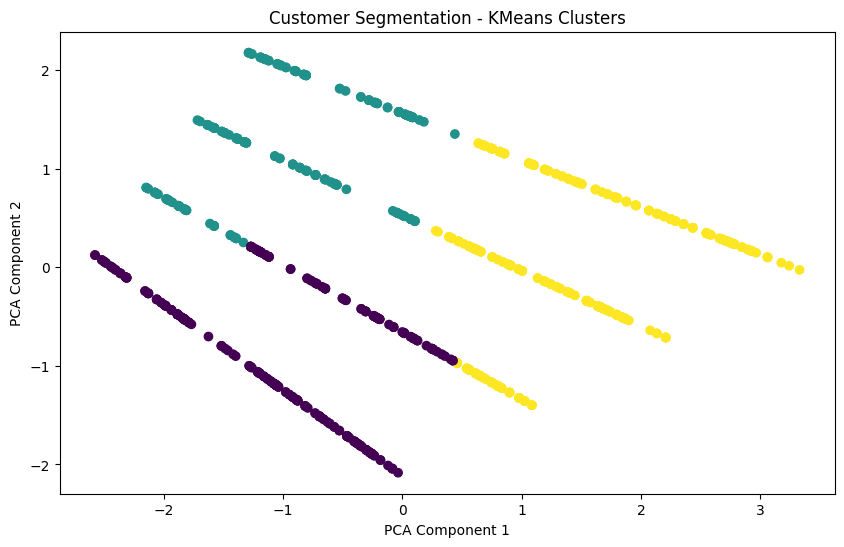

In [21]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis')
plt.title("Customer Segmentation - KMeans Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
